### For an image classification challenge, create and train a ConvNet in Python using TensorFlow. Also, try to improve the performance of the model by applying various hyperparameter tuning to reduce the overfitting or underfitting problems that might occur. Maintain graphs of comparisons.


170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/4
782/782 [==============================] - 84s 105ms/step - loss: 1.4926 - accuracy: 0.4639 - val_loss: 1.2060 - val_accuracy: 0.5736
Epoch 2/4
782/782 [==============================] - 75s 96ms/step - loss: 1.1139 - accuracy: 0.6090 - val_loss: 1.0163 - val_accuracy: 0.6514
Epoch 3/4
782/782 [==============================] - 74s 95ms/step - loss: 0.9715 - accuracy: 0.6625 - val_loss: 0.9828 - val_accuracy: 0.6595
Epoch 4/4
313/313 [==============================] - 4s 14ms/step - loss: 0.9241 - accuracy: 0.6823
Test Loss: 0.9240734577178955
Test Accuracy: 0.6822999715805054


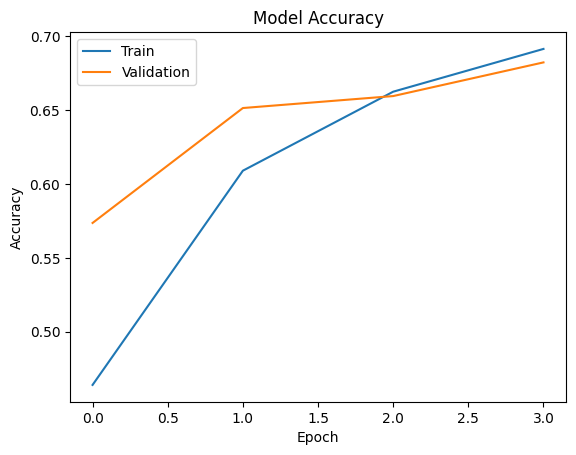

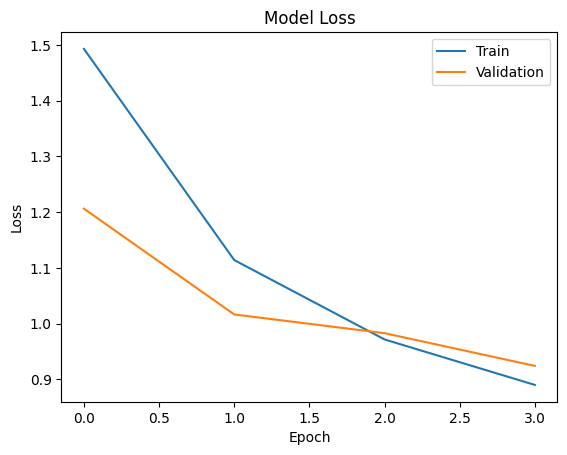

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Define the ConvNet model architecture
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=4, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
